In [8]:
# EMC2 WP 2 Processing 0.2
# GeoPackage : Subset preparation (on a single commune)
# BD_TOPO (Building, roads, administrative limits and activity areas),
# Filosofi (population)
# Author : Perez Joan

In [9]:
# 0.1 Packages, local filepaths & parameters
import os
import pandas
import geopandas as gpd

# Set filepaths to gpkg created in section 0.1
main_gpkg = "C:\\Users\\jperez\\Documents\\Current 1\\emc2\\Output\\WP2_DPC_0.1.gpkg"

# Specify the file path to record the subset
subset_gpkg = "C:\\Users\\jperez\\Documents\\Current 1\\emc2\\Output\\WP2_DPC_0.1_Subset.gpkg"

# Name of the commune for the subset (example : Drap)
subset = "Drap"

In [10]:
## 1. load all layers from gpkg

# Read the administrative boundaries
administrative = gpd.read_file(main_gpkg, layer="administrative", engine='pyogrio', use_arrow=True)
# Read roads
road = gpd.read_file(main_gpkg, layer="road", engine='pyogrio', use_arrow=True)
# Read buildings
building = gpd.read_file(main_gpkg, layer="building", engine='pyogrio', use_arrow=True)
# Read activity areas
activity_area = gpd.read_file(main_gpkg, layer="activity_area", engine='pyogrio', use_arrow=True)
# Read population
population = gpd.read_file(main_gpkg, layer="population", engine='pyogrio', use_arrow=True)

In [13]:
## 2. Subset & clean data

## 3. Create a subset for a given commune
administrative_subset = administrative[administrative["nom_officiel"] == subset]
population_subset = geopandas.sjoin(population, administrative_subset[['geometry']], predicate='intersects')
building_subset = geopandas.sjoin(building, administrative_subset[['geometry']], predicate='intersects')
road_subset = geopandas.sjoin(road, administrative_subset[['geometry']], predicate='intersects')
activity_area_subset = geopandas.sjoin(activity_area, administrative_subset[['geometry']], predicate='intersects')

In [18]:
## 4. Create GPKG for downloaded department & subset

# Save the GeoDataFrames to a GeoPackage file
population_subset.to_file(subset_gpkg, layer = "population", driver="GPKG")
building_subset.to_file(subset_gpkg, layer = "building", driver="GPKG")
road_subset.to_file(subset_gpkg, layer = "road", driver="GPKG")
administrative_subset.to_file(subset_gpkg, layer = "administrative", driver="GPKG")
activity_area_subset.to_file(subset_gpkg, layer = "activity_area", driver="GPKG")

In [15]:
# Appendices
import contextily
import matplotlib.pyplot as plt

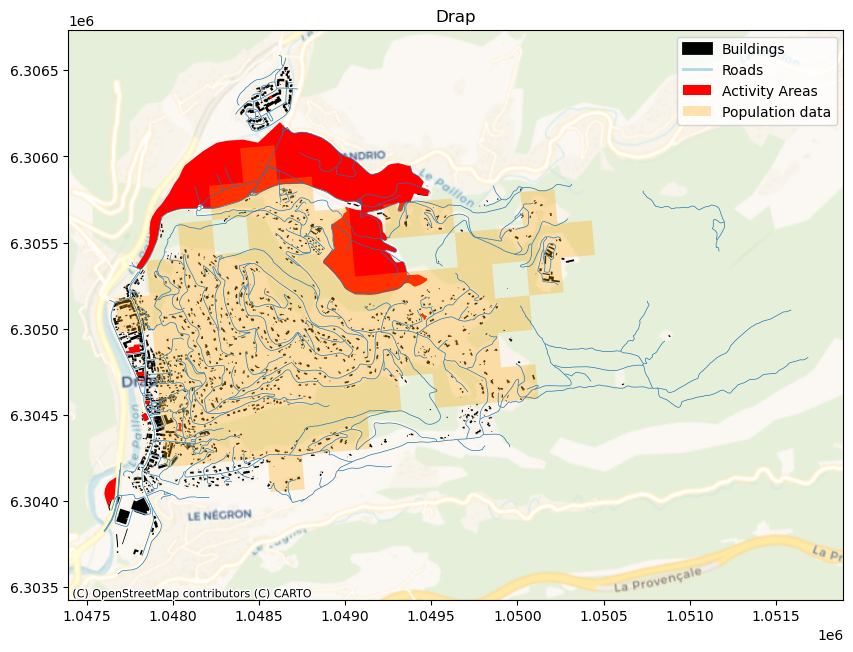

In [17]:
# Appendix A3 : Map of subset
# Create custom legend handles
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color='black', lw=2, label='Buildings'),  # For buildings
    plt.Line2D([0], [0], color='lightblue', lw=2, label='Roads'), # For roads
    plt.Rectangle((0, 0), 1, 1, color='red', ec='none', label='Activity Areas'),  # For activity areas
    plt.Rectangle((0, 0), 1, 1, fc='orange', ec='none', label='Population data', alpha=0.3)  # For population
]
# Create a plot with building_clean
ax = building_subset.plot(figsize=(10, 10), color='black')
# Plot road_clean on the same map
road_subset.plot(ax=ax, linewidth=0.5)
# Plot activity areas on the same map
activity_area_subset.plot(ax=ax, color='red')
# Plot population on the same map
ax = population_subset.plot(ax=ax, alpha=0.3, color='orange')
# Add title & legend
plt.title(subset)
ax.legend(handles=legend_handles)
# Add basemap
contextily.add_basemap(ax, crs=population_subset.crs, source=contextily.providers.CartoDB.Voyager)